In [142]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Database

In [37]:
df = pd.read_excel('/content/drive/MyDrive/S5/Data Mining/week8-9/Simple-Linear-Regression-master/produksiPadi.xlsx')

# Sneak Peak Data

In [38]:
# melihat 5 baris teratas
df.head()

,Tahun,Produksi Padi(Ton),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,1970,18693649.0,NaN,NaN,NaN,NaN
1,1971,20483687.0,NaN,NaN,NaN,NaN
2,1972,19393933.0,NaN,NaN,Ubah data tersebut secara lagging,NaN
3,1973,21490578.0,NaN,NaN,NaN,NaN
4,1974,22476073.0,NaN,NaN,Lakukan Split Ratio --> 70 : 30,NaN


In [39]:
# melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tahun               53 non-null     int64  
 1   Produksi Padi(Ton)  53 non-null     float64
 2   Unnamed: 2          0 non-null      float64
 3   Unnamed: 3          0 non-null      float64
 4   Unnamed: 4          7 non-null      object 
 5   Unnamed: 5          2 non-null      object 
dtypes: float64(3), int64(1), object(2)
memory usage: 2.6+ KB


# Handling Missing Value

In [40]:
# mencari missing value
df.isnull().sum()

,0
Tahun,0
Produksi Padi(Ton),0
Unnamed: 2,53
Unnamed: 3,53
Unnamed: 4,46
Unnamed: 5,51


In [41]:
# mengambil semua baris hanya pada kolom tahun dan produksi padi yang di masukkan ke variable baru bernama df_new
df_new = df.loc[:,['Tahun','Produksi Padi(Ton)']]
df_new

,Tahun,Produksi Padi(Ton)
0,1970,18693649.00
1,1971,20483687.00
2,1972,19393933.00
3,1973,21490578.00
4,1974,22476073.00
5,1975,22339455.00
6,1976,23300939.00
7,1977,23347132.00
8,1978,25771570.00
9,1979,26282663.00


In [42]:
df.info()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tahun               53 non-null     int64  
 1   Produksi Padi(Ton)  53 non-null     float64
 2   Unnamed: 2          0 non-null      float64
 3   Unnamed: 3          0 non-null      float64
 4   Unnamed: 4          7 non-null      object 
 5   Unnamed: 5          2 non-null      object 
dtypes: float64(3), int64(1), object(2)
memory usage: 2.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tahun               53 non-null     int64  
 1   Produksi Padi(Ton)  53 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 976.0 bytes


In [43]:
# membandingkan jumlah baris dan kolom df pertama handling missing value
df.shape

(53, 6)

In [44]:
# jumlah baris dan kolom df_new setelah handling missing value
df_new.shape

(53, 2)

In [45]:
# melhat statistik deskripsi dari data berupa mean, kuartil, dll
df_new.describe()

,Tahun,Produksi Padi(Ton)
count,53.000000,5.300000e+01
mean,1996.000000,4.694139e+07
std,15.443445,1.632983e+07
min,1970.000000,1.869365e+07
25%,1983.000000,3.530311e+07
50%,1996.000000,4.937705e+07
75%,2009.000000,5.460403e+07
max,2022.000000,8.114862e+07


In [46]:
# proses shifting dan lagging
df_new['Produksi Padi(Ton) 1 Tahun lalu'] = df_new['Produksi Padi(Ton)'].shift(1)
df_new

,Tahun,Produksi Padi(Ton),Produksi Padi(Ton) 1 Tahun lalu
0,1970,18693649.00,NaN
1,1971,20483687.00,18693649.00
2,1972,19393933.00,20483687.00
3,1973,21490578.00,19393933.00
4,1974,22476073.00,21490578.00
5,1975,22339455.00,22476073.00
6,1976,23300939.00,22339455.00
7,1977,23347132.00,23300939.00
8,1978,25771570.00,23347132.00
9,1979,26282663.00,25771570.00


In [47]:
df_new.isnull().head()

,Tahun,Produksi Padi(Ton),Produksi Padi(Ton) 1 Tahun lalu
0,False,False,True
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [48]:
df_clean = df_new.dropna()
df_clean

,Tahun,Produksi Padi(Ton),Produksi Padi(Ton) 1 Tahun lalu
1,1971,20483687.00,18693649.00
2,1972,19393933.00,20483687.00
3,1973,21490578.00,19393933.00
4,1974,22476073.00,21490578.00
5,1975,22339455.00,22476073.00
6,1976,23300939.00,22339455.00
7,1977,23347132.00,23300939.00
8,1978,25771570.00,23347132.00
9,1979,26282663.00,25771570.00
10,1980,29651905.00,26282663.00


# Exploratory Data Analysis

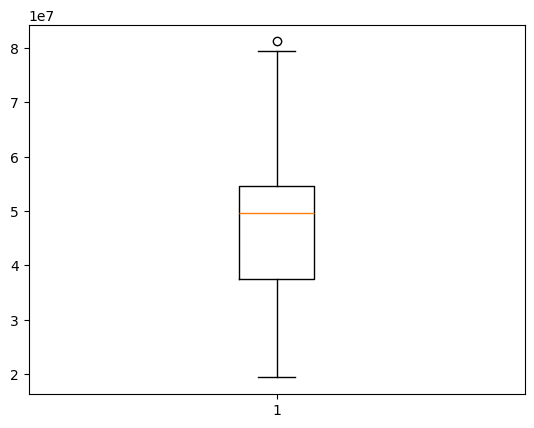

In [49]:
plt.boxplot(df_clean['Produksi Padi(Ton)'])
plt.show()

# Modelling

In [50]:
# Recall Data
df_clean.head()

,Tahun,Produksi Padi(Ton),Produksi Padi(Ton) 1 Tahun lalu
1,1971,20483687.0,18693649.0
2,1972,19393933.0,20483687.0
3,1973,21490578.0,19393933.0
4,1974,22476073.0,21490578.0
5,1975,22339455.0,22476073.0


In [124]:
# pertama, buat variable x dan y
X = df_clean['Tahun'].values.reshape(-1,1)
y = df_clean.drop(columns='Tahun')

In [125]:
# kedua, split data menjadi training dan testing dengan porsi 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [126]:
# ketiga, membuat object linear regresi
lin_reg = LinearRegression()

In [127]:
# keempat, train the model menggunakan training data yang sudah displit
lin_reg.fit(X_train, y_train)

LinearRegression()

In [128]:
# kelima, mencari nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[ 982305.66613184]
 [1043330.82297303]]
[-1.91352310e+09 -2.03604116e+09]


Dari nilai m dan b diatas, kalau dimasukkan ke dalam rumus menjadi: Y = 0.92404x - 4188665.36

In [133]:
# coba membuat kedalam dataframe
# coef_dict = {
#     'features': y.columns,
#     'coef_value': lin_reg.coef_
# }
# coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
# coef

In [131]:
# keenam, mencari accuracy score dari model menggunakan testing data yang sudah displit
lin_reg.score(X_test, y_test)

0.8101605319413123

Model kita mendapatkan accuracy score sebesar 98.29%

In [119]:
# ketujuh, visualisasi aktual vs prediksi menggunakan data testing
# garis merah merupakan garis regresi dari persamaan yang didapat tadi
# y_predict = lin_reg.predict(X_test)

# plt.scatter(X_test, y_test)
# plt.plot(X_test, y_predict, c='r')
# plt.xlabel('Produksi Padi (Ton)')
# plt.ylabel('Tahun')
# plt.title('Plot Produksi padi vs Tahun')
# plt.show()

# Evaluasi

In [143]:
y_pred = lin_reg.predict(X_test)
mean_squared_error(y_test, y_pred)

29104650849882.81

# Prediction

Memulai Prediksi Produksi Padi pada tahun 2023 dan 2024

In [132]:
# Prediksi Produksi Padi pada tahun 2023
lin_reg.predict([[2023]])

array([[73681261.436548  , 74617095.04263687]])

In [134]:
# Prediksi Produksi Padi pada tahun 2024
lin_reg.predict([[2024]])

array([[74663567.10267997, 75660425.86560988]])